In [95]:
# Import all required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsCassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

ImportError: cannot import name 'KNeighborsCassifier' from 'sklearn.neighbors' (C:\Python\Lib\site-packages\sklearn\neighbors\__init__.py)

In [66]:
df = pd.read_csv(r"D:\student_knn_dataset.csv")
df.head(5)

,Study_Hours,Attendance,Previous_Score,Practice_Test,Result
0,1.0,45,35,0,Fail
1,1.5,50,38,1,Fail
2,2.0,52,40,1,Fail
3,2.0,55,42,2,Fail
4,2.5,58,44,2,Fail


In [67]:
df.tail(5)

,Study_Hours,Attendance,Previous_Score,Practice_Test,Result
41,4.6,73,55,4,Pass
42,5.6,78,59,5,Pass
43,6.6,84,64,6,Pass
44,7.6,90,68,7,Pass
45,8.6,93,72,8,Pass


In [68]:
df.describe()

,Study_Hours,Attendance,Previous_Score,Practice_Test
count,46.000000,46.000000,46.000000,46.000000
mean,5.093478,73.543478,55.782609,4.413043
std,2.434055,15.245701,12.281717,2.390501
min,1.000000,45.000000,34.000000,0.000000
25%,3.050000,62.250000,46.250000,3.000000
50%,5.000000,75.500000,56.500000,4.500000
75%,6.950000,86.750000,65.750000,6.000000
max,10.000000,96.000000,78.000000,9.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Study_Hours     46 non-null     float64
 1   Attendance      46 non-null     int64  
 2   Previous_Score  46 non-null     int64  
 3   Practice_Test   46 non-null     int64  
 4   Result          46 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ KB


In [70]:
X = df.drop("Result", axis = 1)
X.head(5)

,Study_Hours,Attendance,Previous_Score,Practice_Test
0,1.0,45,35,0
1,1.5,50,38,1
2,2.0,52,40,1
3,2.0,55,42,2
4,2.5,58,44,2


In [71]:
Y = df['Result']
Y.head(5)

0    Fail
1    Fail
2    Fail
3    Fail
4    Fail
Name: Result, dtype: object

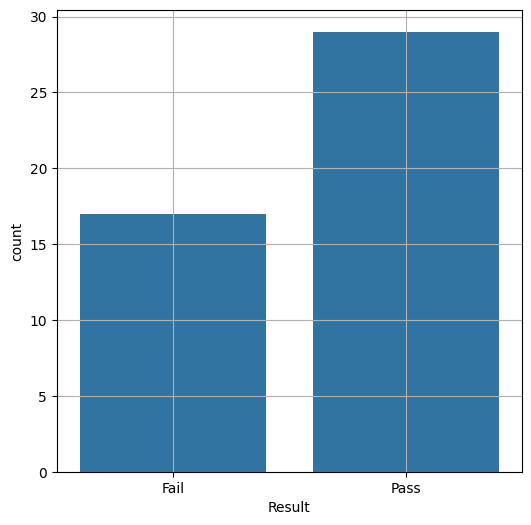

In [72]:
plt.figure(figsize = (6,6))
sns.countplot(x = df['Result'])
plt.grid(True)

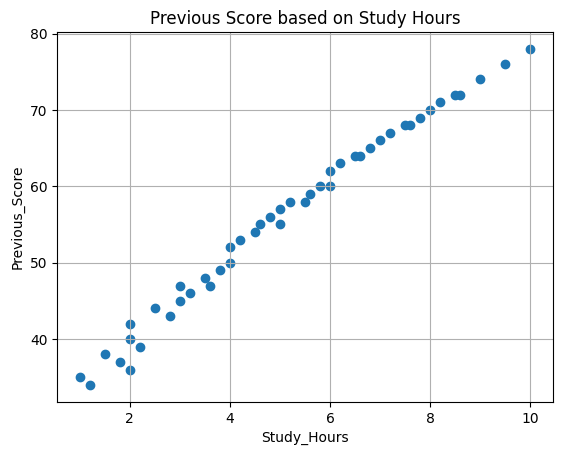

In [73]:
plt.scatter(x = df['Study_Hours'], y = df['Previous_Score'])
plt.title("Previous Score based on Study Hours")
plt.xlabel("Study_Hours")
plt.ylabel("Previous_Score")
plt.grid(True)
plt.show()

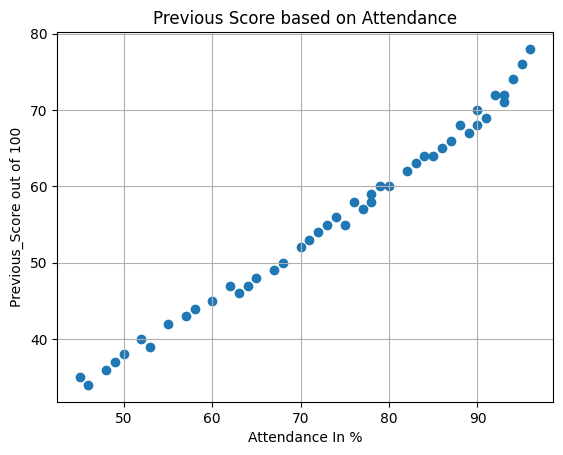

In [74]:
plt.scatter(df['Attendance'], df['Previous_Score'])
plt.title("Previous Score based on Attendance")
plt.xlabel("Attendance In %")
plt.ylabel("Previous_Score out of 100")
plt.grid(True)
plt.show()

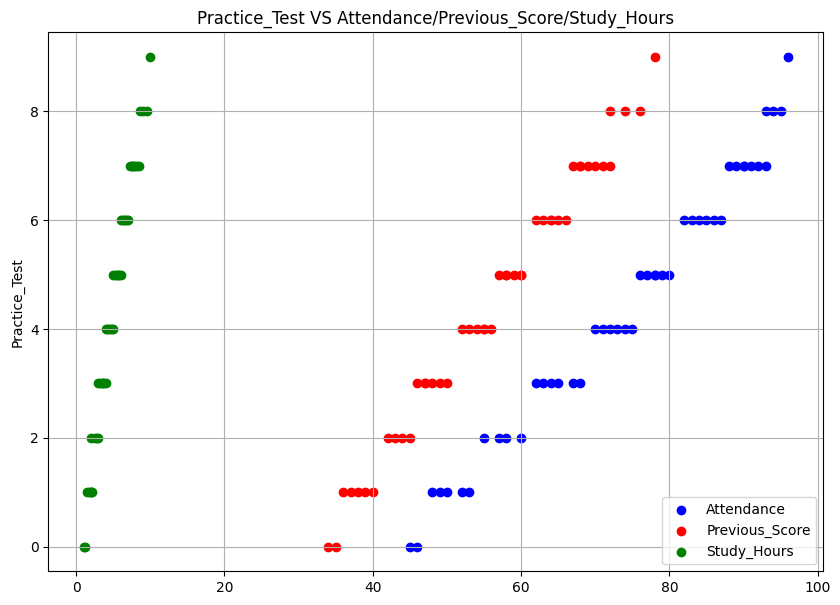

In [75]:
plt.figure(figsize = (10,7))
plt.scatter(df['Attendance'], df['Practice_Test'], color = "blue", label = "Attendance")
plt.scatter(df['Previous_Score'], df['Practice_Test'], color = "red", label = "Previous_Score")
plt.scatter(df['Study_Hours'], df['Practice_Test'], color = "Green", label = "Study_Hours")
plt.title("Practice_Test VS Attendance/Previous_Score/Study_Hours")
plt.ylabel("Practice_Test")
plt.legend()
plt.grid(True)
plt.show()

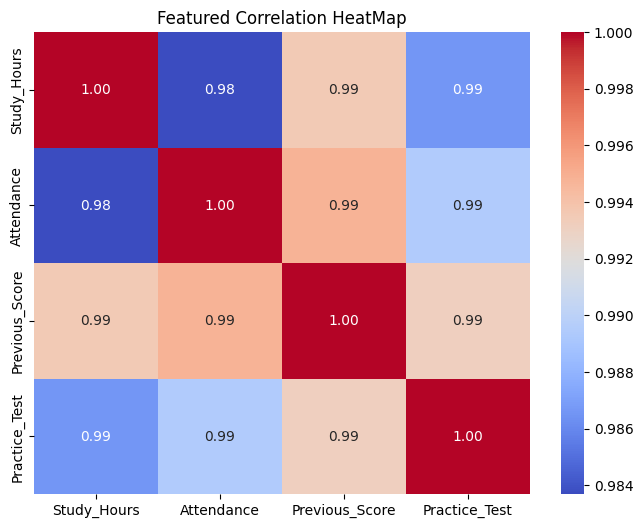

In [76]:
corr = df[['Study_Hours','Attendance','Previous_Score','Practice_Test']].corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Featured Correlation HeatMap")
plt.show()

In [77]:
le = LabelEncoder()
Y_encoded = le.fit_transform(Y)
print(Y_encoded)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 1]


In [78]:
x_train,x_test,y_train,y_test = train_test_split(X,Y_encoded, test_size = 0.2, random_state = 42)

In [79]:
#Features Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [80]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [81]:
y_pred = knn.predict(x_test)

In [83]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [84]:
y_test

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [86]:
# Accuracy Score
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy:-{accuracy}")

Accuracy:-1.0


In [87]:
#Classification Report
print(f"Classification Report:-{classification_report(y_pred, y_test)}")

Classification Report:-              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



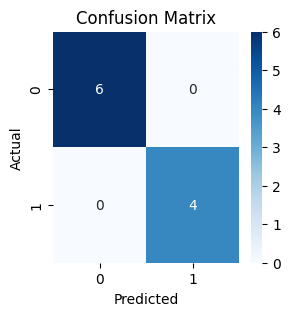

In [92]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_pred, y_test)
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

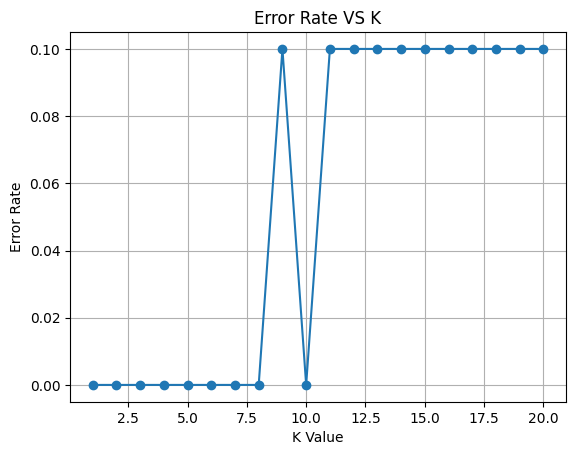

In [94]:
error = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))
plt.plot(range(1,21), error, marker = "o")
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate VS K")
plt.grid(True)
plt.show()